In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from sklearn.preprocessing import MinMaxScaler
import datetime

C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
data = pd.read_csv('./csv/celltrion.csv', index_col=[0])
data.drop(['keyword'], axis='columns', inplace=True)
origin_data = data
# print(origin_data)


In [3]:
close = data['close'].values

In [4]:
# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(close) - sequence_length):
    result.append(close[index: index + sequence_length])
    
result[-1][-1]

290000.0

In [5]:
scaler = MinMaxScaler()
scaler.fit(result)
result = scaler.transform(result)
result = np.array(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
# np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]
# x_train.shape, x_test.shape

In [6]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Train on 1061 samples, validate on 118 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1061/1061 [==============================] - 4s 3ms/sample - loss: 0.0085 - val_loss: 0.0102
Epoch 2/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0027 - val_loss: 0.0077
Epoch 3/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0021 - val_loss: 0.0056
Epoch 4/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 5/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0011 - val_loss: 0.0014
Epoch 8/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
1061/10

1061/1061 [==============================] - 3s 3ms/sample - loss: 6.0862e-04 - val_loss: 7.1539e-04
Epoch 72/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 6.0326e-04 - val_loss: 7.1943e-04
Epoch 73/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 5.7188e-04 - val_loss: 0.0011
Epoch 74/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 5.7761e-04 - val_loss: 7.1865e-04
Epoch 75/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 5.6628e-04 - val_loss: 0.0013
Epoch 76/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 5.9856e-04 - val_loss: 7.5688e-04
Epoch 77/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 6.0917e-04 - val_loss: 0.0013
Epoch 78/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 5.5962e-04 - val_loss: 0.0015
Epoch 79/100
1061/1061 [==============================] - 3s 3ms/sample - loss: 6.1963e-04 - val_loss: 7.2257e-04
Epo

In [8]:
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

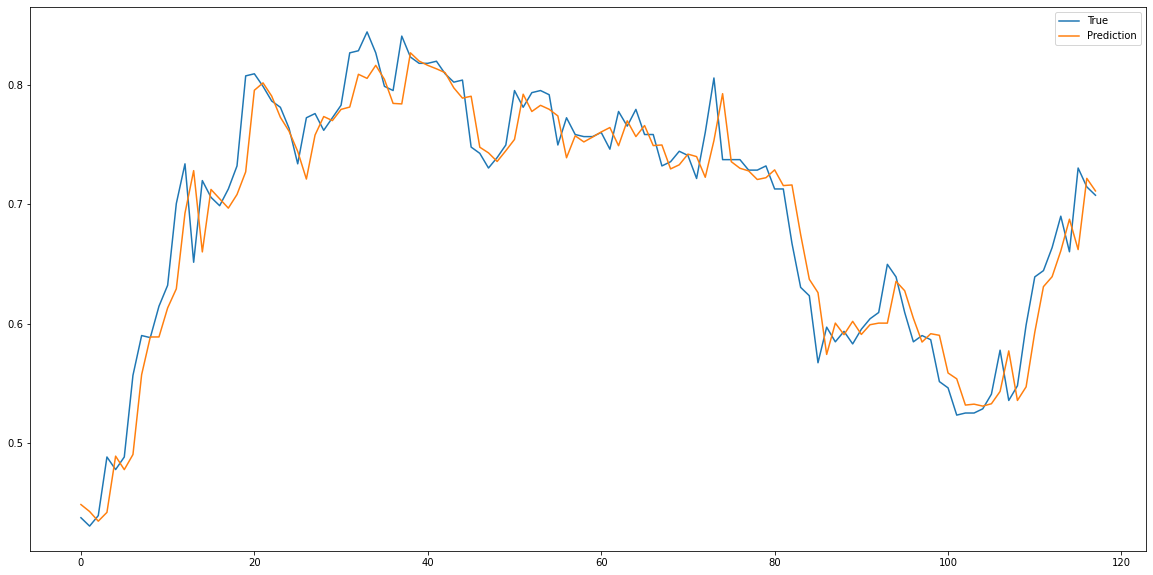

In [9]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [10]:
max_value = origin_data['close'].max()
print(max_value)

pred_stock = origin_data[-50:]
pred_stock = pred_stock['close']

pred_stock = pred_stock.tolist()

temp = []
for item in pred_stock:
#     print(f'item : {item}, calc : {item / max_value}')
    temp.append(item / max_value)

pred_stock = np.reshape(temp, (50, 1))
pred_stock = np.reshape(pred_stock, (1, 50, 1))
# print(type(pred_stock))    

pred_stock = model.predict(pred_stock)
pred_stock = np.reshape(pred_stock, 1)
pred_stock = pred_stock * max_value
print(pred_stock)
print(pred_stock.shape)

# print(result)
# print(len(result))

373500.0
[285568.44]
(1,)


289000.0
last y_test value : 289000.0
last pred value : 290345.0
next pred value : 285568.4375


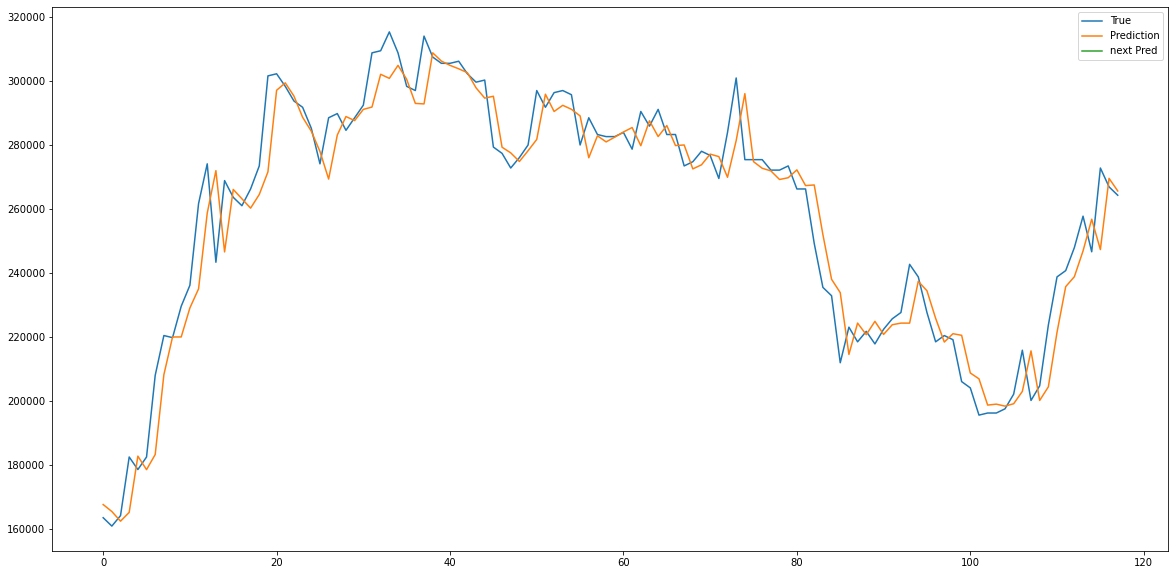

In [11]:
import math

max_value = origin_data['close'].max()
last_value = origin_data['close'].tolist()[-1]
print(last_value)
# print(type(last_value))

pred = model.predict(x_test)
# print(x_test.shape)
pred = np.reshape(pred, (pred.shape[0]))

result_y = []
result_pred = []

for y_val in y_test:
    value = round(y_val * max_value)
    result_y.append(value)

for pred_val in pred:
    value = round(pred_val * max_value)
    result_pred.append(value)

y_test = np.array(result_y)
pred = np.array(result_pred)

# print(f'last origin value : {origin_data['close']}')
diff_value = last_value - y_test[-1]
print(f'last y_test value : {y_test[-1] + diff_value}')
print(f'last pred value : {pred[-1] + diff_value}')
print(f'next pred value : {pred_stock[-1]}')
    
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_stock, label='next Pred')
ax.legend()
plt.show()

In [12]:
model.save('./h5/celltrion.h5')

(5, 50, 1)
origin : [241000. 259000. 272000. 285000. 296500.]
pred : [270848, 277166, 270294, 284141, 282020]


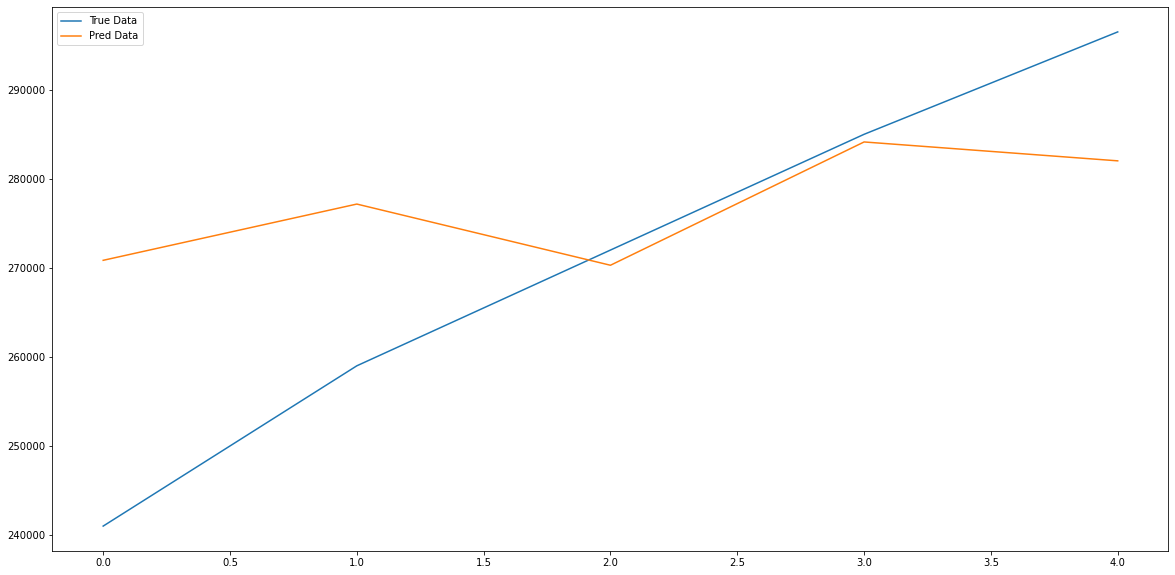

In [46]:
model = load_model('./h5/celltrion.h5')

data = pd.read_csv('./csv/celltrion.csv', index_col=[0])
data.drop(['keyword'], axis='columns', inplace=True)

datas = []
maxs = []
origin_result = []

data = data['close']

start_idx = -56
end_idx = -6

for _ in range(0, 5):
    max_value = data[start_idx:end_idx].max()
    
    values = data[start_idx:end_idx]
    
    datas.append(values / max_value)
    
    if end_idx != -1:
        origin_result.append(values[end_idx: end_idx + 1].values[0])
    else:
        origin_result.append(values[end_idx:].values[0])
        
    maxs.append(max_value)
     
    start_idx += 1
    end_idx += 1

datas = np.array(datas)
maxs = np.array(maxs)
origin_result = np.array(origin_result)

# print(datas)
# print(maxs)
# print(origin_result)
    
datas = np.reshape(datas, (datas.shape[0], datas.shape[1], 1))
print(datas.shape)
# print(type(datas))
predict_result = model.predict(datas)

# print(f'origin : {origin_result}')
# print(f'predict : {predict_result}')

predict_result_arr = []

for idx in range(0, 5):
    predict_result_arr.append(int(predict_result[idx][0] * maxs[idx]))
print(f'origin : {origin_result}')
print(f'pred : {predict_result_arr}')

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(origin_result, label='True Data')
ax.plot(predict_result_arr, label='Pred Data')
ax.legend()
plt.show()

pred : [[0.85172355]]
last value : 0.8517235517501831
pred : [[0.83544004]]
last value : 0.8354400396347046
pred : [[0.8180088]]
last value : 0.8180087804794312
pred : [[0.8001523]]
last value : 0.8001523017883301
pred : [[0.78443205]]
last value : 0.784432053565979
[241000. 259000. 272000. 285000. 296500.]
[270848, 265669, 260126, 254448, 249449]


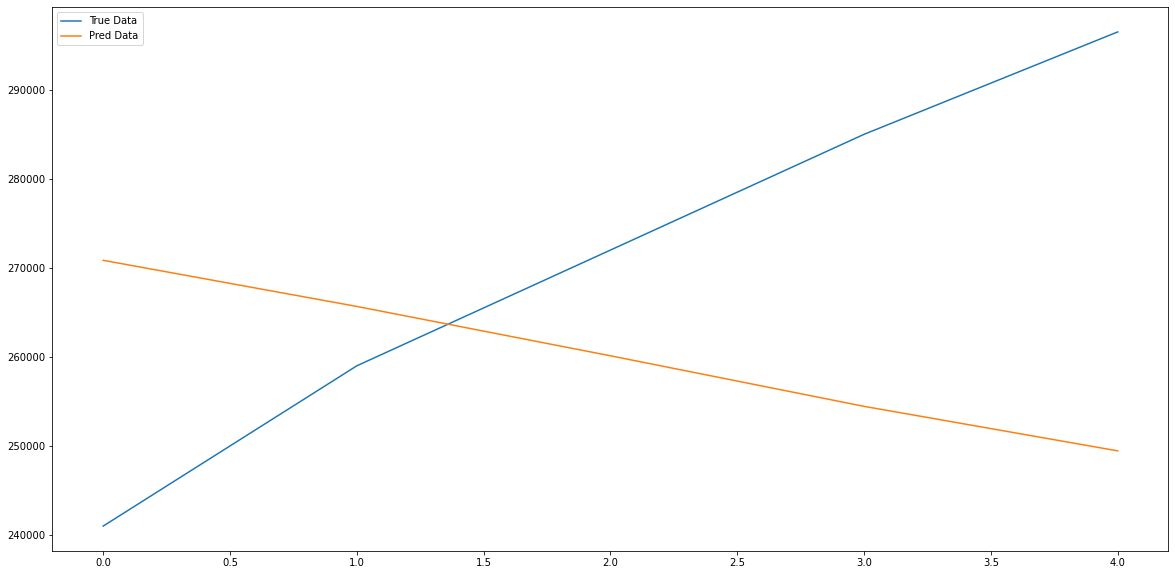

In [51]:
pred_reuslt = []

data = pd.read_csv('./csv/celltrion.csv', index_col=[0])
data.drop(['keyword'], axis='columns', inplace=True)

data = data['close']

start_idx = -56
end_idx = -6

base_values = data[start_idx:end_idx]
# print(f'base_values : {base_values}')

max_value = base_values.max()
base_values = list(data[start_idx:end_idx] / max_value)

# print(f'base_values : {base_values}')
# print(f'max_value : {max_value}')

model = load_model('./h5/celltrion.h5')

for idx in range(0, 5):
    pred_values = np.array(base_values)
    pred_values = np.reshape(pred_values, (1, 50, 1))
    pred = model.predict(pred_values)
    print(f'pred : {pred}')
    
    pred = np.reshape(pred, (1,))
#     print(pred.shape)

    pred_reuslt.append(int(pred[0] * max_value))
    base_values.append(pred[0])
    base_values = base_values[1:]
    print(f'last value : {base_values[-1]}')

print(origin_result)
print(pred_reuslt)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(origin_result, label='True Data')
ax.plot(pred_reuslt, label='Pred Data')
ax.legend()
plt.show()

In [50]:
!pip freeze

absl-py==0.9.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
aniso8601==8.0.0
argh==0.26.2
asn1crypto==1.3.0
astor==0.8.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.6.0
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
branca==0.4.1
certifi==2020.6.20
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
com-blackTensor==0.1
com-blacktensor-api==0.1
comtypes==1.1.7
conda==4.8.3
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.14
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
